In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the dataset

In [2]:
wine = pd.read_csv(r'C:\Users\user\Downloads\cargoflash\knn\winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3


In [3]:
wine.shape

(1599, 12)

In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Checking for null values

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## outlinear

In [7]:
wine.describe(percentiles = [.01,.05,.10,.25,.5,.75,.90,.95,.99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,3.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.000000
1%,5.200000,0.190000,0.000000,1.400000,0.042980,3.000000,8.000000,0.991820,2.930000,0.420000,9.000000,2.000000
5%,6.100000,0.270000,0.000000,1.590000,0.054000,4.000000,11.000000,0.993598,3.060000,0.470000,9.200000,3.000000
10%,6.500000,0.310000,0.010000,1.700000,0.060000,5.000000,14.000000,0.994556,3.120000,0.500000,9.300000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,3.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,4.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,4.000000


(1597, 12)

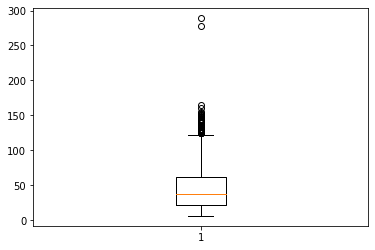

In [8]:
plt.boxplot(wine['total sulfur dioxide'])
Q1 = wine['total sulfur dioxide'].quantile(0.1)
Q3 = wine['total sulfur dioxide'].quantile(0.9)
IQR = Q3 - Q1
wine = wine[(wine['total sulfur dioxide'] <= Q3 + 1.5*IQR)]
wine.shape

(1596, 12)

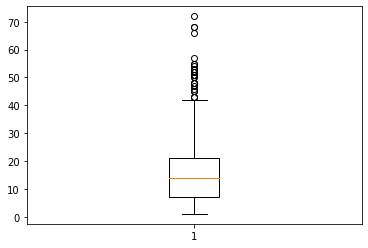

In [9]:
plt.boxplot(wine['free sulfur dioxide'])
Q1 = wine['free sulfur dioxide'].quantile(0.1)
Q3 = wine['free sulfur dioxide'].quantile(0.9)
IQR = Q3 - Q1
wine = wine[(wine['free sulfur dioxide'] <= Q3 + 1.5*IQR)]
wine.shape

(1563, 12)

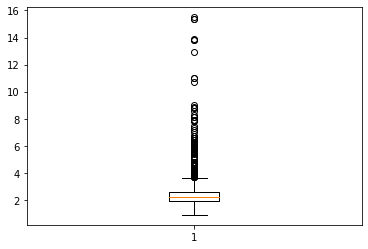

In [10]:
plt.boxplot(wine['residual sugar'])
Q1 = wine['residual sugar'].quantile(0.1)
Q3 = wine['residual sugar'].quantile(0.9)
IQR = Q3 - Q1
wine = wine[(wine['residual sugar'] <= Q3 + 1.5*IQR)]
wine.shape

## Checking Coorelation between the variables

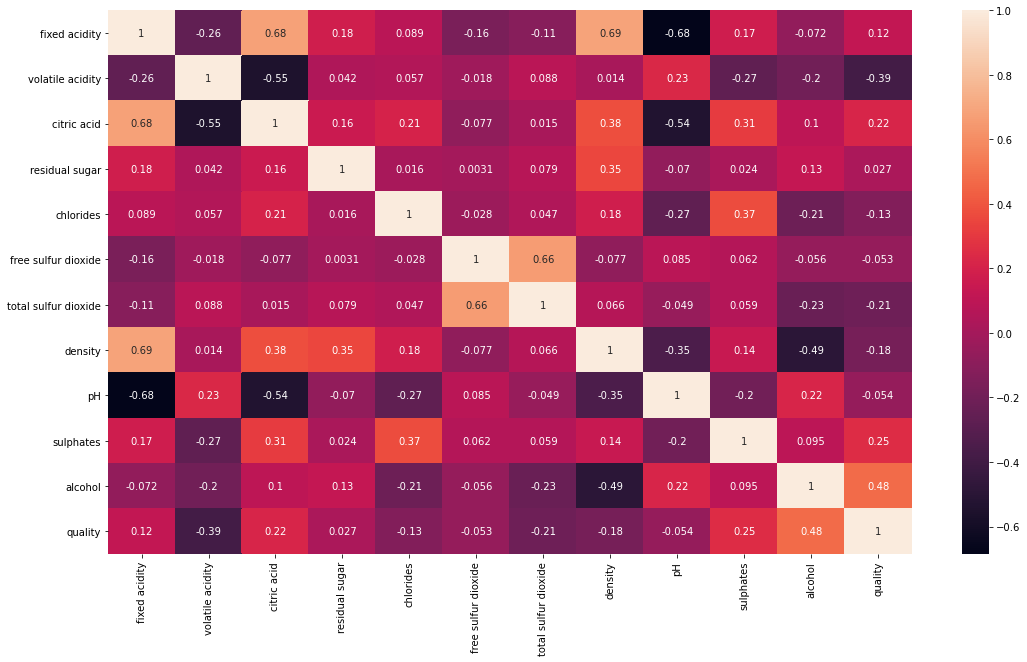

In [11]:
plt.figure(figsize=(18,10))

sns.heatmap(wine.corr(), annot=True)
plt.show()

## Data Preparation

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = wine

y = x.pop('quality')

num_vars = x.columns

num_vars = list(num_vars)

x[num_vars] = scaler.fit_transform(x[num_vars])

x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.529788,0.959596,-1.385802,-0.563877,-0.238141,-0.454721,-0.363983,0.599933,1.278854,-0.578583,-0.970961
1,-0.299002,1.964127,-1.385802,0.258871,0.230509,0.960873,0.694715,0.055688,-0.726529,0.126819,-0.592374
2,-0.299002,1.294440,-1.179815,-0.093735,0.102695,-0.050266,0.277652,0.164537,-0.338390,-0.049532,-0.592374
3,1.662673,-1.384310,1.498021,-0.563877,-0.259443,0.151962,0.470143,0.708782,-0.985288,-0.461016,-0.592374
4,-0.529788,0.959596,-1.385802,-0.563877,-0.238141,-0.454721,-0.363983,0.599933,1.278854,-0.578583,-0.970961
5,-0.529788,0.736367,-1.385802,-0.681413,-0.259443,-0.252494,-0.171493,0.599933,1.278854,-0.578583,-0.970961
6,-0.241306,0.401523,-1.076821,-0.916484,-0.387257,-0.050266,0.438061,-0.162009,-0.079631,-1.166417,-0.970961
7,-0.587484,0.680560,-1.385802,-1.386626,-0.472466,-0.050266,-0.781046,-1.141650,0.502577,-1.107634,-0.403081
8,-0.299002,0.289909,-1.282808,-0.446342,-0.302048,-0.656949,-0.877292,0.055688,0.308508,-0.519799,-0.876314
9,-0.472091,-0.156550,0.468084,4.372615,-0.344652,0.151962,1.817577,0.599933,0.243818,0.832220,0.070152


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Model Building and Evaluation

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_accuracy = []
k_list = list(range(1,50,1))
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test,y_preds))

<Figure size 432x288 with 0 Axes>

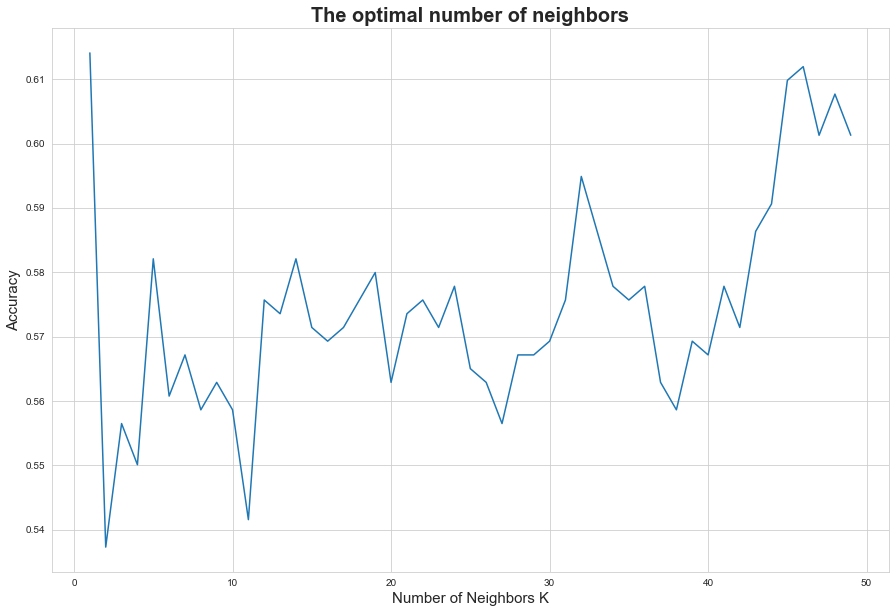

In [18]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, knn_accuracy)

plt.show()

In [19]:
k_max = knn_accuracy.index(max(knn_accuracy))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(knn_accuracy)*100))

At K = 1, Max Accuracy = 61.407249466950965
